In [6]:
# AG_ADC1
#plots all mean profiles


In [7]:

import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


In [8]:
# path for data
path_les= "../DATA_ADC_paper1/LES/"
path_adc= "../DATA_ADC_paper1/ADC/"
path_les= "/Users/amrapalli/Desktop/DATA_ADC_paper1/LES/"
path_adc= "/Users/amrapalli/Desktop/DATA_ADC_paper1/ADC/"

In [9]:
# density calculation from given temp and salinity
def density_eos(t,s):
    alpha=2e-4; beta=8e-4; g=9.81; rho=1026.0
    density= rho*(1.0-alpha*(t-20)+beta*(s-35))
    return density

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


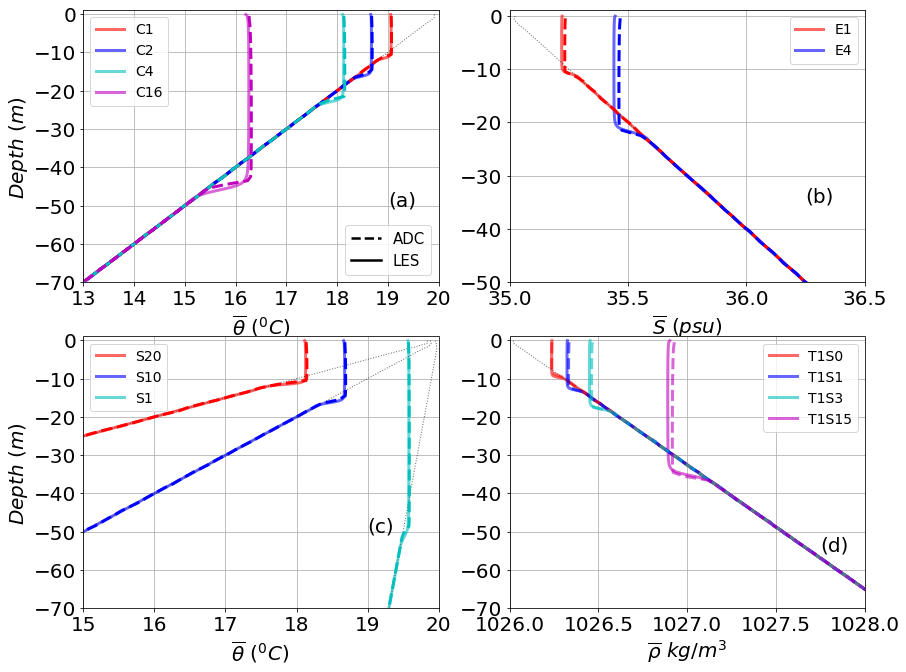

In [10]:
# plot of mean profiles
# final hour 
t=96
# average duration
t1=t-6  
#depth
d=70

# plot
fig = plt.figure(figsize=(14,11))
#all C cases
plt.subplot(221)
#file names
file_names_les = [*[f"Cooling{x}" for x in [1, 2, 4, 16]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"C{x}" for x in [1, 2, 4, 16]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]

#plot LES
for fn, ls in zip(file_names_les, line_styles_les):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    plt.plot(np.mean(les.variables["temp"][t1:t,:],axis=0),les.variables["zm"][:],ls,alpha=0.6,linewidth=3)
legend=plt.legend(["C1","C2","C4","C16"],fontsize=14)
les= Dataset(path_les+'Cooling1.nc', mode='r')
plt.plot((les.variables["temp"][0,:]),les.variables["zm"][:],':k',alpha=0.6,linewidth=1)
#plot ADC
for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fn}_1m.nc', mode='r')
    plt.plot(np.mean(mf.variables['temperature'][t1:t,0,:],axis=0),fh.variables['zMid'][1,1,:],ls,linewidth=3)

#additional legend
legend_elements2 = [Line2D([0], [0], linestyle='--', color='k', label='ADC',markerfacecolor='k', linewidth=2.5),                 
                   Line2D([0], [0], linestyle='-', color='k', label='LES',markerfacecolor='k', linewidth=2.5),]                 
legend2=plt.legend(handles=legend_elements2,loc=4,fontsize=15)
plt.gca().add_artist(legend)

#axis properties
plt.ylim(-d,1); plt.xlim(13,20)
plt.xlabel('$\overline{\\theta}$ $(^0C)$',fontsize=20)
plt.ylabel('$Depth$ $(m)$ ',fontsize=20)
plt.grid()
plt.text(19,-50, r'(a)', fontsize=20)
plt.xticks(fontsize=20); plt.yticks(fontsize=20)

#all E cases
plt.subplot(222)
#file names
file_names_les = [*[f"Evap{x}" for x in [1, 4]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"E{x}" for x in [1, 4]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]

#plot LES
for fn, ls in zip(file_names_les, line_styles_les):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    plt.plot(np.mean(les.variables["salt"][t1:t,:],axis=0),les.variables["zm"][:],ls,alpha=0.6,linewidth=3)
legend=plt.legend(["E1","E4"],fontsize=14)

les= Dataset(path_les+'Evap1.nc', mode='r')
plt.plot((les.variables["salt"][0,:]),les.variables["zm"][:],':k',alpha=0.6,linewidth=1)

#plot ADC
for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fn}_1m.nc', mode='r')
    plt.plot(np.mean(mf.variables['salinity'][t1:t,0,:],axis=0),fh.variables['zMid'][1,1,:],ls,linewidth=3)

plt.legend(["E1","E4"],fontsize=14)
plt.ylim(-50,1); plt.xlim(35,36.5)
plt.text(36.25,-35, r'(b)', fontsize=20)
plt.grid()
plt.xticks(fontsize=20);plt.yticks(fontsize=20)
plt.xlabel('$\overline{S}$ $(psu)$',fontsize=20)
plt.locator_params(axis='x', nbins=5)


plt.subplot(223)
file_names_les = [*[f"Strat{x}" for x in [20, 10, 1]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"S{x}" for x in [20,10, 1]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]

#plot LES
for fn, ls in zip(file_names_les, line_styles_les):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    plt.plot(np.mean(les.variables["temp"][t1:t,:],axis=0),les.variables["zm"][:],ls,alpha=0.6,linewidth=3)
legend=plt.legend(["S20","S10","S1"],fontsize=14)
for fn, ls in zip(file_names_les, line_styles_les):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    plt.plot((les.variables["temp"][0,:]),les.variables["zm"][:],':k',alpha=0.6,linewidth=1)

#plot ADC
for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fn}_1m.nc', mode='r')
    plt.plot(np.mean(mf.variables['temperature'][t1:t,0,:],axis=0),fh.variables['zMid'][1,1,:],ls,linewidth=3)

plt.ylim(-d,1);plt.xlim(15,20)
plt.grid()
plt.xlabel('$\overline{\\theta}$ $(^0C)$ ',fontsize=20)
plt.text(19,-50, r'(c)', fontsize=20)
plt.legend(["S20","S10","S1"],fontsize=14)
plt.xticks(fontsize=20); plt.yticks(fontsize=20)
plt.ylabel('$Depth$ $(m)$ ',fontsize=20)




plt.subplot(224)
file_names_les = [*[f"T1S{x}" for x in [0, 1, 3, 15]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"T1S{x}" for x in [0, 1, 3, 15]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]

#plot LES
for fn, ls in zip(file_names_les, line_styles_les):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    plt.plot(np.mean(density_eos(les.variables["temp"][t1:t,:],les.variables["salt"][t1:t,:]),axis=0),les.variables["zm"][:],ls,alpha=0.6,linewidth=3)
legend=plt.legend(["T1S0","T1S1","T1S3", "T1S15"],fontsize=14)
les= Dataset(path_les+'T1S0.nc', mode='r')
plt.plot(density_eos(les.variables["temp"][0,:],les.variables["salt"][0,:]),les.variables["zm"][:],':k',alpha=0.6,linewidth=1)

#plot ADC
for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fn}_1m.nc', mode='r')
    plt.plot(np.mean(density_eos(mf.variables["temperature"][t1:t,0,:],mf.variables["salinity"][t1:t,0,:]),axis=0),fh.variables['zMid'][1,1,:],ls,alpha=0.6,linewidth=3)


plt.xlim(1026,1028)
plt.grid()
plt.xlabel('$\overline{\\rho}$ $kg/m^3$',fontsize=20)
plt.text(1027.75, -55,"(d)", fontsize=20)
plt.ylim(-d,1)
plt.locator_params(axis='x', nbins=5) # to decide number of points in axis
plt.xticks(fontsize=20);plt.yticks(fontsize=20)
plt.savefig('all_mean_6.eps')
